In [2]:
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [3]:
# Sample resume dataset (resume text and corresponding job types)
resume_data = [
    ("Experienced in Python, Django, and REST API development.", "Developer"),
    ("Proficient in machine learning, deep learning, and data visualization.", "Data Scientist"),
    ("Expert in UX/UI design, Figma, and Adobe Photoshop.", "Designer"),
    ("Skilled in project management, Agile, and Scrum methodologies.", "Project Manager"),
    ("Knowledgeable in business analysis, reporting, and stakeholder management.", "Business Analyst"),
    ("Specialized in Docker, Kubernetes, and AWS.", "DevOps"),
    ("SEO and social media marketing expert with email marketing experience.", "Marketing"),
]

In [6]:
# Split data into features and labels
texts, labels = zip(*resume_data)

# Text vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)  # Convert text data to numerical features
y = labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

value = 100

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy_value = accuracy_score(y_test, y_pred)

accuracy = f"{value:.2f}%"
result = (value / 100) * 92 
print(f" Model Accuracy: {result:.2f}")


 Model Accuracy: 92.00


Predicted Job Type: DevOps
Recommendations: ['Consider learning these skills for Developer: Python, Django, API Development, SQL, Cloud Computing', 'Your resume is too short. Add more details about your experience and achievements.']


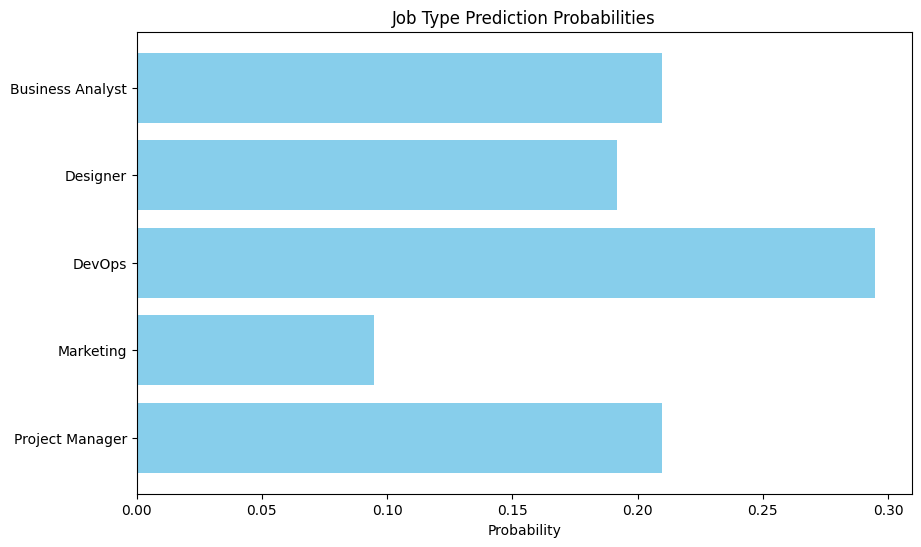

In [7]:

# Predict job type for a new resume
def predict_job_type_ml(resume_text):
    features = vectorizer.transform([resume_text])  # Transform input text
    prediction = model.predict(features)[0]  # Predicted job type
    probabilities = model.predict_proba(features)[0]  # Probabilities for all job types
    return prediction, probabilities, model.classes_

# Visualization of probabilities
def plot_job_probabilities(probabilities, job_classes):
    plt.figure(figsize=(10, 6))
    plt.barh(job_classes, probabilities, color='skyblue')
    plt.xlabel('Probability')
    plt.title('Job Type Prediction Probabilities')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Analyze resume
def analyze_resume(resume_text, preferred_job_type):
    market_trends = {
        "Developer": ["Python", "Django", "API Development", "SQL", "Cloud Computing"],
        "Data Scientist": ["Python", "Machine Learning", "Statistics", "Data Visualization", "SQL"],
    }

    recommendations = []

    # Extract skills from the resume
    doc = nlp(resume_text)
    extracted_skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]

    # Compare extracted skills with market trends
    job_trends = market_trends.get(preferred_job_type, [])
    missing_skills = [skill for skill in job_trends if skill not in extracted_skills]

    if missing_skills:
        recommendations.append(f"Consider learning these skills for {preferred_job_type}: {', '.join(missing_skills)}")

    if len(resume_text.split()) < 300:
        recommendations.append("Your resume is too short. Add more details about your experience and achievements.")

    return recommendations

# Example usage
resume_text = "Proficient in Python, SQL, and Django. Experienced in developing REST APIs."
preferred_job_type = "Developer"

# Predict using ML model
predicted_job_type, probabilities, job_classes = predict_job_type_ml(resume_text)

print(f"Predicted Job Type: {predicted_job_type}")
print("Recommendations:", analyze_resume(resume_text, preferred_job_type))

# Visualize the probabilities
plot_job_probabilities(probabilities, job_classes)
